In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [40]:
df_train = pd.read_csv(r'e:\cka4ok\CODE\Kaggle\Starship_Titanic\train.csv')

In [183]:
df_test = pd.read_csv(r'e:\cka4ok\CODE\Kaggle\Starship_Titanic\test.csv')
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [42]:
df_train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [43]:
# Посмотрим количество пропусков в колонках в процентах

In [71]:
round(df_train.isnull().sum()/df_train.shape[0]*100,2)

PassengerId     0.0
HomePlanet      0.0
CryoSleep       0.0
Destination     0.0
Age             0.0
VIP             0.0
Cabin_deck      0.0
Cabin_num       0.0
Cabin_side      0.0
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
Name            2.3
Transported     0.0
dtype: float64

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [46]:
# Посмотрим количество уникальных значений для нескольких колонок

In [47]:
cols = ['HomePlanet', 'Destination', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
print('Column', 'NUNIQUE')
for column in df_train[cols]:
    print(column, df_train[column].nunique())

Column NUNIQUE
HomePlanet 3
Destination 3
RoomService 1273
FoodCourt 1507
ShoppingMall 1115
Spa 1327
VRDeck 1306


In [48]:
# Построим тепловую карту корреляции колонок

In [49]:
space_corr = df_train.corr()

<AxesSubplot:>

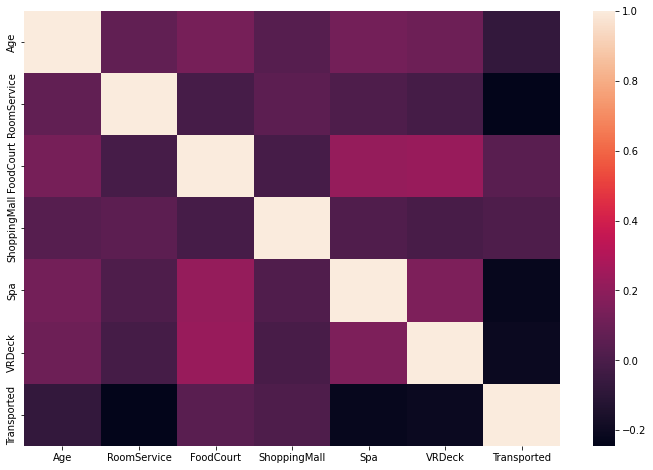

In [50]:
plt.figure(figsize = (12,8))
sns.heatmap(data = space_corr)

# Возраст

In [51]:
# Построим график количества пассажиров по возрасту

Text(0, 0.5, 'Количество пассажиров')

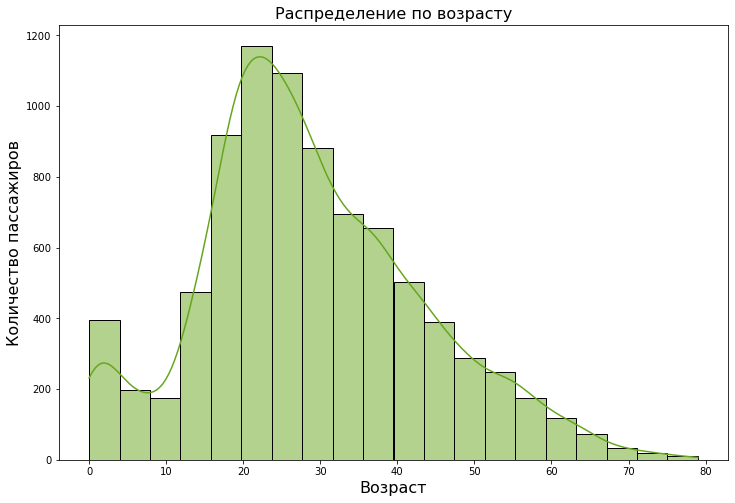

In [52]:
age = df_train.Age
plt.figure(figsize = (12, 8))
sns.histplot(data = age, bins = 20, kde = True, color = sns.color_palette('Dark2_r')[2])
plt.title('Распределение по возрасту', fontsize = 16)
plt.xlabel('Возраст', fontsize = 16)
plt.ylabel('Количество пассажиров', fontsize = 16)

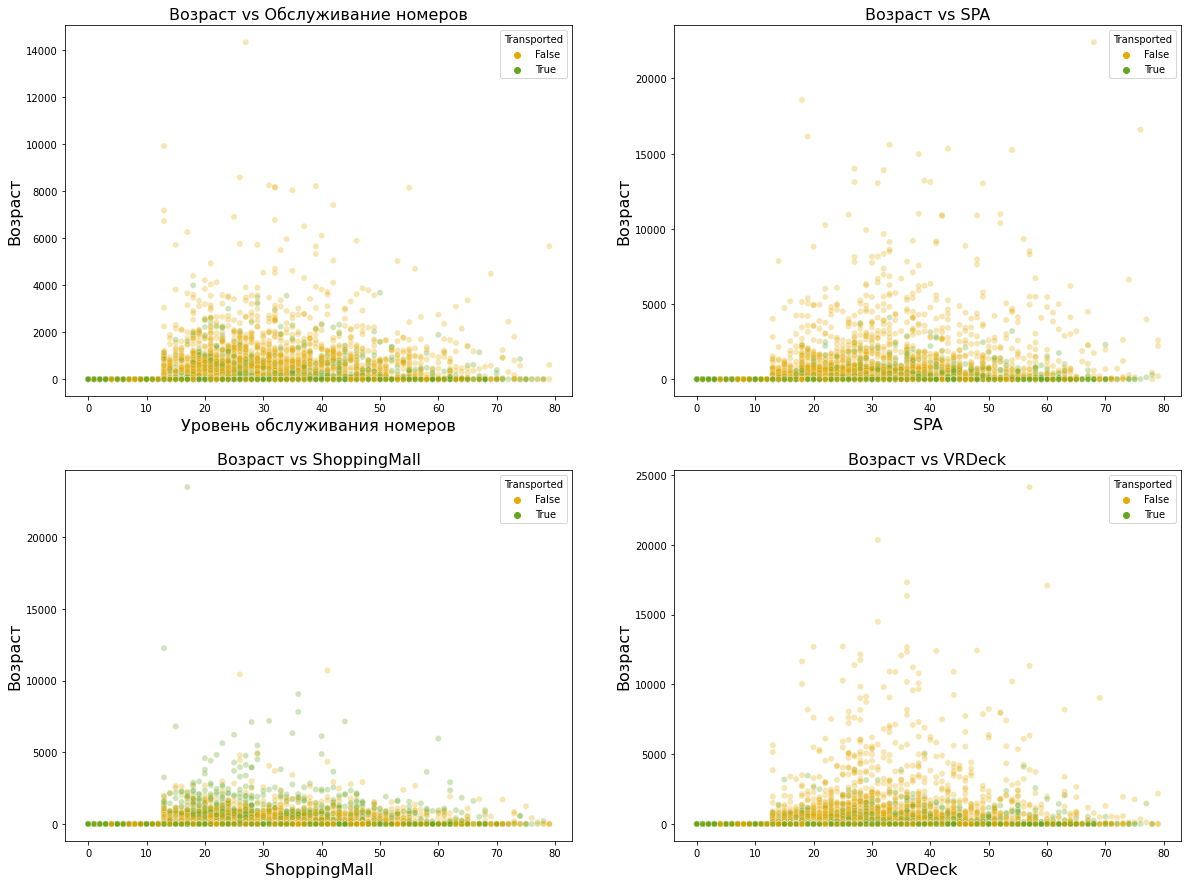

In [53]:
plt.figure(figsize = (20,15))
color = sns.color_palette('Dark2_r')
plt.subplot(2,2,1)
sns.scatterplot(x = age, y = df_train.RoomService, hue = df_train.Transported, palette = color[1:3], alpha = 0.3)
plt.title('Возраст vs Обслуживание номеров', fontsize = 16)
plt.xlabel('Уровень обслуживания номеров', fontsize = 16)
plt.ylabel('Возраст', fontsize = 16)

plt.subplot(2,2,2)
sns.scatterplot(x = age, y = df_train.Spa, hue = df_train.Transported, palette = color[1:3], alpha = 0.3)
plt.title('Возраст vs SPA', fontsize = 16)
plt.xlabel('SPA', fontsize = 16)
plt.ylabel('Возраст', fontsize = 16)

plt.subplot(2,2,3)
sns.scatterplot(x = age, y = df_train.ShoppingMall, hue = df_train.Transported, palette = color[1:3], alpha = 0.3)
plt.title('Возраст vs ShoppingMall', fontsize = 16)
plt.xlabel('ShoppingMall', fontsize = 16)
plt.ylabel('Возраст', fontsize = 16)

plt.subplot(2,2,4)
sns.scatterplot(x = age, y = df_train.VRDeck, hue = df_train.Transported, palette = color[1:3], alpha = 0.3)
plt.title('Возраст vs VRDeck', fontsize = 16)
plt.xlabel('VRDeck', fontsize = 16)
plt.ylabel('Возраст', fontsize = 16);

# Кабины

In [54]:
Cabin = df_train.Cabin
df_train['Cabin_deck'] = Cabin.apply(lambda cabin: str(cabin).split('/')[0])
df_train['Cabin_num'] = Cabin.dropna().apply(lambda cabin: int(str(cabin).split('/')[1]))
df_train['Cabin_side'] = Cabin.dropna().apply(lambda cabin: str(cabin).split('/')[2])
df_train.drop(columns = 'Cabin', inplace = True)

In [60]:
df_train = df_train[['PassengerId','HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'Cabin_deck', 'Cabin_num',\
                     'Cabin_side', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported']]

In [61]:
# Распределение пассажиров по палубам Cabin_deck

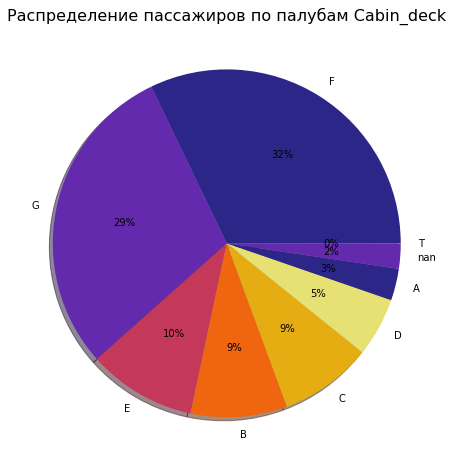

In [62]:
plt.figure(figsize=(12,8))
colors = sns.color_palette('CMRmap')
plt.pie(x = df_train.Cabin_deck.value_counts().values, labels=df_train.Cabin_deck.value_counts().index, colors=colors, shadow=True, autopct = '%.0f%%')
plt.title('Распределение пассажиров по палубам Cabin_deck', fontsize = 16);

C:\Users\nspetrenko.RNINFORM\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nspetrenko.RNINFORM\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


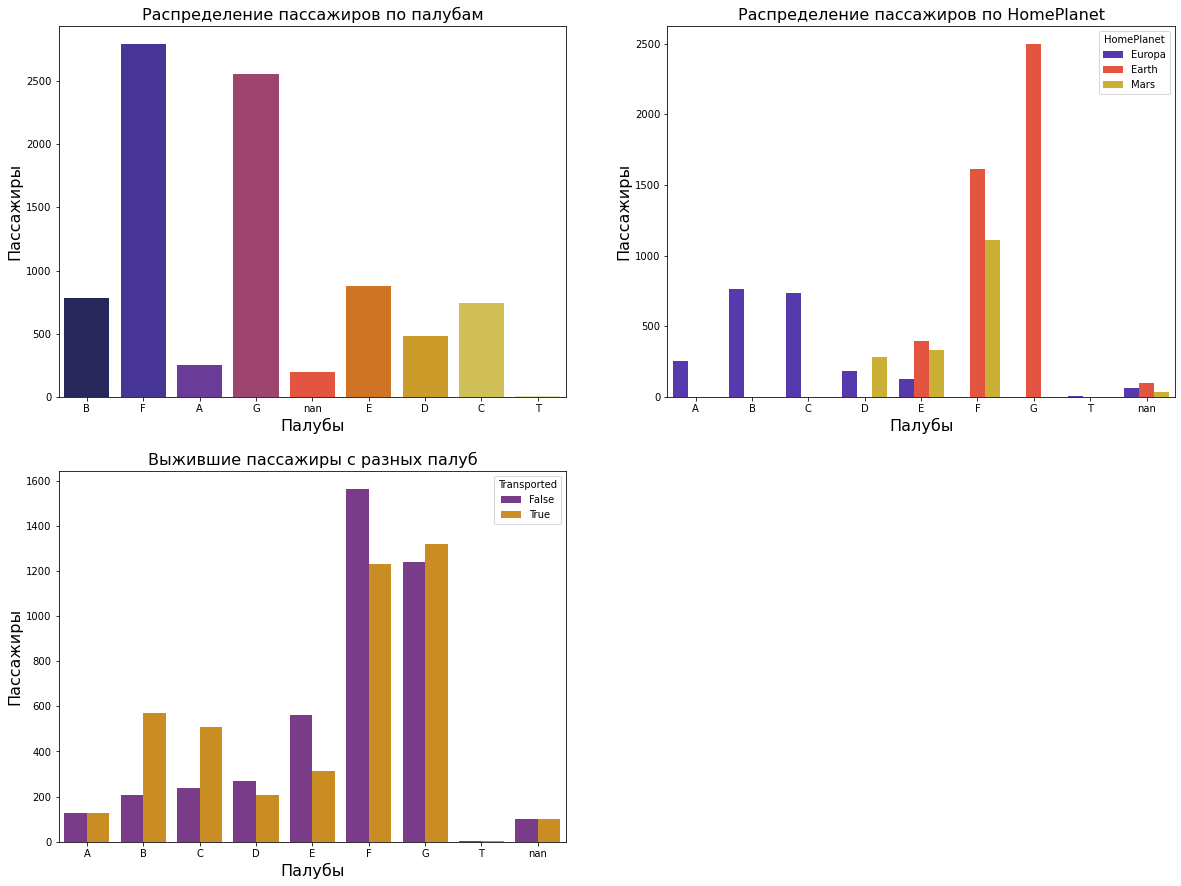

In [63]:
plt.figure(figsize = (20,15))
plt.subplot(2,2,1)
sns.countplot(df_train.Cabin_deck, palette = 'CMRmap')
plt.title('Распределение пассажиров по палубам', fontsize = 16)
plt.xlabel('Палубы', fontsize = 16)
plt.ylabel('Пассажиры', fontsize = 16);

plt.subplot(2,2,2)
sns.countplot(x = df_train.Cabin_deck.sort_values(), hue = df_train.HomePlanet, palette = 'CMRmap')
plt.title('Распределение пассажиров по HomePlanet', fontsize = 16)
plt.xlabel('Палубы', fontsize = 16)
plt.ylabel('Пассажиры', fontsize = 16)

plt.subplot(2,2,3)
deck_trans = df_train[['Cabin_deck', 'Transported']]
sns.countplot(deck_trans['Cabin_deck'].sort_values(), hue = deck_trans['Transported'], palette = 'CMRmap')
plt.title('Выжившие пассажиры с разных палуб', fontsize = 16)
plt.xlabel('Палубы', fontsize = 16)
plt.ylabel('Пассажиры', fontsize = 16);

# Обработка пропущенных данных

In [64]:
# Пропущенные значения в столбце Cabin_deck заполняем средним значением

In [65]:
df_train.Cabin_deck.replace('nan', 'G', inplace = True)

C:\Users\nspetrenko.RNINFORM\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [67]:
df_train.Cabin_deck.value_counts()

F    2794
G    2758
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin_deck, dtype: int64

In [ ]:
# Пропущенные значения в столбце HomePlanet заполняем самым популярным значением

In [33]:
# df_train.HomePlanet.fillna(value = df_train.HomePlanet.value_counts().sort_values().index[-1], axis = 0, inplace = True)

In [118]:
# Пропущенные значения CryoSleep заполняем аналогично

In [37]:
# df_train.CryoSleep.fillna(value = df_train.CryoSleep.value_counts().sort_values().index[-1], axis = 0, inplace = True)

In [31]:
# Пропущенные значения Cabin_num заполняем средними!!!!!!

In [46]:
# df_train.Cabin_num.fillna(value = df_train.Cabin_num.mean(), inplace = True)

In [120]:
# Пропущенные значения Cabin_side заполняем самым популярным значением

In [52]:
# df_train.Cabin_side.fillna(value = df_train.Cabin_side.value_counts().sort_values().index[-1], axis = 0, inplace = True)

In [121]:
# Короче дальше аналогично

In [57]:
# df_train.Age.fillna(value = df_train.Age.mean(), axis = 0, inplace = True)

In [60]:
# df_train.Destination.fillna(value = df_train.Destination.value_counts().sort_values().index[-1], axis = 0, inplace = True)

In [62]:
# df_train.VIP.fillna(value = df_train.VIP.value_counts().sort_values().index[-1], axis = 0, inplace = True)

In [32]:
# Для всех числовых столбцов пропуски заменяю медианой

In [68]:
cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_num', 'Age']
for column in df_train[cols]:
    df_train[column].fillna(value = df_train[column].mean(), axis = 0, inplace = True)

C:\Users\nspetrenko.RNINFORM\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [35]:
# Для всех категориальных и булевых столбцов пропуски заменяю самым популярным значением

In [69]:
cols = ['HomePlanet', 'CryoSleep', 'Cabin_side', 'Destination', 'VIP']
for column in df_train[cols]:
    df_train[column].fillna(df_train[column].value_counts().sort_values().index[-1], axis = 0, inplace = True)

In [70]:
df_train

PassengerId HomePlanet  CryoSleep    Destination   Age    VIP Cabin_deck  \
0        0001_01     Europa      False    TRAPPIST-1e  39.0  False          B   
1        0002_01      Earth      False    TRAPPIST-1e  24.0  False          F   
2        0003_01     Europa      False    TRAPPIST-1e  58.0   True          A   
3        0003_02     Europa      False    TRAPPIST-1e  33.0  False          A   
4        0004_01      Earth      False    TRAPPIST-1e  16.0  False          F   
...          ...        ...        ...            ...   ...    ...        ...   
8688     9276_01     Europa      False    55 Cancri e  41.0   True          A   
8689     9278_01      Earth       True  PSO J318.5-22  18.0  False          G   
8690     9279_01      Earth      False    TRAPPIST-1e  26.0  False          G   
8691     9280_01     Europa      False    55 Cancri e  32.0  False          E   
8692     9280_02     Europa      False    TRAPPIST-1e  44.0  False          E   

      Cabin_num Cabin_side  RoomService  FoodCourt  ShoppingMall     Spa  \
0           0.0          P          0.0        0.0           0.0     0.0   
1           0.0          S        109.0        9.0          25.0   549.0   
2           0.0          S         43.0     3576.0           0.0  6715.0   
3           0.0          S          0.0     1283.0         371.0  3329.0   
4           1.0          S        303.0       70.0         151.0   565.0   
...         ...        ...          ...        ...           ...     ...   
8688       98.0          P          0.0     6819.0           0.0  1643.0   
8689     1499.0          S          0.0        0.0           0.0     0.0   
8690     1500.0          S          0.0        0.0        1872.0     1.0   
8691      608.0          S          0.0     1049.0           0.0   353.0   
8692      608.0          S        126.0     4688.0           0.0     0.0   

      VRDeck               Name  Transported  
0        0.0    Maham Ofracculy        False  
1       44.0       Juanna Vines         True  
2       49.0      Altark Susent        False  
3      193.0       Solam Susent        False  
4        2.0  Willy Santantines         True  
...      ...                ...          ...  
8688    74.0  Gravior Noxnuther        False  
8689     0.0    Kurta Mondalley        False  
8690     0.0       Fayey Connon         True  
8691  3235.0   Celeon Hontichre        False  
8692    12.0   Propsh Hontichre         True  

[8693 rows x 16 columns]

In [72]:
name = df_train.pop('Name')

In [73]:
pass_id = df_train.pop('PassengerId')

# Перекодируем категориальные переменные, используя методы OneHotEncoding

In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   object 
 5   Cabin_deck    8693 non-null   object 
 6   Cabin_num     8693 non-null   float64
 7   Cabin_side    8693 non-null   object 
 8   RoomService   8693 non-null   float64
 9   FoodCourt     8693 non-null   float64
 10  ShoppingMall  8693 non-null   float64
 11  Spa           8693 non-null   float64
 12  VRDeck        8693 non-null   float64
 13  Transported   8693 non-null   object 
dtypes: float64(7), object(7)
memory usage: 950.9+ KB


In [79]:
cols = ['CryoSleep', 'VIP', 'Transported']
for column in df_train[cols]:
    df_train[column] = df_train[column].astype('object')

C:\Users\NSPETR~1.RNI\AppData\Local\Temp/ipykernel_15348/2377926124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[column] = df_train[column].astype('object')


In [80]:
from sklearn.compose import make_column_transformer, make_column_selector

In [81]:
selector = make_column_selector(dtype_include = object)

In [82]:
categorical_data = selector(df_train)

In [83]:
categorical_data = df_train[categorical_data]
categorical_data

HomePlanet CryoSleep    Destination    VIP Cabin_deck Cabin_side  \
0        Europa     False    TRAPPIST-1e  False          B          P   
1         Earth     False    TRAPPIST-1e  False          F          S   
2        Europa     False    TRAPPIST-1e   True          A          S   
3        Europa     False    TRAPPIST-1e  False          A          S   
4         Earth     False    TRAPPIST-1e  False          F          S   
...         ...       ...            ...    ...        ...        ...   
8688     Europa     False    55 Cancri e   True          A          P   
8689      Earth      True  PSO J318.5-22  False          G          S   
8690      Earth     False    TRAPPIST-1e  False          G          S   
8691     Europa     False    55 Cancri e  False          E          S   
8692     Europa     False    TRAPPIST-1e  False          E          S   

     Transported  
0          False  
1           True  
2          False  
3          False  
4           True  
...          ...  
8688       False  
8689       False  
8690        True  
8691       False  
8692        True  

[8693 rows x 7 columns]

In [143]:
# from sklearn.preprocessing import OneHotEncoder

In [144]:
# encoder = OneHotEncoder(drop = 'first', sparse = False)
# encoder_columns = encoder.fit_transform(categorical_data)

In [ ]:
# feature_names = encoder.get_feature_names(categorical_data.columns)
# feature_names

In [146]:
# encoded_data = pd.DataFrame(data = encoder_columns, columns = feature_names)

In [ ]:
# encoded_data

In [148]:
# Всю эту непонятную и муторную возню с OneHotEncoder мне кажется было бы разумно и удобнее заменить на pd.get_dummies(categorical_data, drop_first = 'True')

In [ ]:
# encoded_data = pd.get_dummies(categorical_data, drop_first = True)
# encoded_data.head()

In [98]:
train_new = df_train.join(pd.get_dummies(categorical_data, drop_first = True))
train_new.head()

HomePlanet CryoSleep  Destination   Age    VIP Cabin_deck  Cabin_num  \
0     Europa     False  TRAPPIST-1e  39.0  False          B        0.0   
1      Earth     False  TRAPPIST-1e  24.0  False          F        0.0   
2     Europa     False  TRAPPIST-1e  58.0   True          A        0.0   
3     Europa     False  TRAPPIST-1e  33.0  False          A        0.0   
4      Earth     False  TRAPPIST-1e  16.0  False          F        1.0   

  Cabin_side  RoomService  FoodCourt  ...  VIP_True  Cabin_deck_B  \
0          P          0.0        0.0  ...         0             1   
1          S        109.0        9.0  ...         0             0   
2          S         43.0     3576.0  ...         1             0   
3          S          0.0     1283.0  ...         0             0   
4          S        303.0       70.0  ...         0             0   

   Cabin_deck_C Cabin_deck_D  Cabin_deck_E  Cabin_deck_F  Cabin_deck_G  \
0             0            0             0             0             0   
1             0            0             0             1             0   
2             0            0             0             0             0   
3             0            0             0             0             0   
4             0            0             0             1             0   

   Cabin_deck_T  Cabin_side_S  Transported_True  
0             0             0                 0  
1             0             1                 1  
2             0             1                 0  
3             0             1                 0  
4             0             1                 1  

[5 rows x 29 columns]

In [103]:
# train_new = pd.concat([df_train, encoded_data], axis = 1)

In [104]:
train_new.drop(categorical_data.columns, axis = 1, inplace = True)

In [105]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8693 non-null   float64
 1   Cabin_num                  8693 non-null   float64
 2   RoomService                8693 non-null   float64
 3   FoodCourt                  8693 non-null   float64
 4   ShoppingMall               8693 non-null   float64
 5   Spa                        8693 non-null   float64
 6   VRDeck                     8693 non-null   float64
 7   HomePlanet_Europa          8693 non-null   uint8  
 8   HomePlanet_Mars            8693 non-null   uint8  
 9   CryoSleep_True             8693 non-null   uint8  
 10  Destination_PSO J318.5-22  8693 non-null   uint8  
 11  Destination_TRAPPIST-1e    8693 non-null   uint8  
 12  VIP_True                   8693 non-null   uint8  
 13  Cabin_deck_B               8693 non-null   uint8

# Нормализация числовых данных

In [92]:
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler масштабирует (нормализует) колонки с чтсловыми данными широкого диапазона в данные в диапазоне [0-1]

In [93]:
scaler = MinMaxScaler()
normal_data = scaler.fit_transform(train_new[['Age', 'Cabin_num', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
normal_data = pd.DataFrame(columns = ['Age', 'Cabin_num', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], data = normal_data)
normal_data

Age  Cabin_num  RoomService  FoodCourt  ShoppingMall       Spa  \
0     0.493671   0.000000     0.000000   0.000000      0.000000  0.000000   
1     0.303797   0.000000     0.007608   0.000302      0.001064  0.024500   
2     0.734177   0.000000     0.003001   0.119948      0.000000  0.299670   
3     0.417722   0.000000     0.000000   0.043035      0.015793  0.148563   
4     0.202532   0.000528     0.021149   0.002348      0.006428  0.025214   
...        ...        ...          ...        ...           ...       ...   
8688  0.518987   0.051742     0.000000   0.228726      0.000000  0.073322   
8689  0.227848   0.791447     0.000000   0.000000      0.000000  0.000000   
8690  0.329114   0.791975     0.000000   0.000000      0.079687  0.000045   
8691  0.405063   0.321014     0.000000   0.035186      0.000000  0.015753   
8692  0.556962   0.321014     0.008795   0.157247      0.000000  0.000000   

        VRDeck  
0     0.000000  
1     0.001823  
2     0.002030  
3     0.007997  
4     0.000083  
...        ...  
8688  0.003066  
8689  0.000000  
8690  0.000000  
8691  0.134049  
8692  0.000497  

[8693 rows x 7 columns]

In [94]:
train_new.drop(['Age', 'Cabin_num', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis = 1, inplace = True)
train_new = pd.concat([train_new, normal_data], axis = 1)

In [108]:
train_new.columns

Index(['Age', 'Cabin_num', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_True',
       'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E',
       'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_deck_T', 'Cabin_side_S',
       'Transported_True'],
      dtype='object')

# Начинаем обучение модели Случайный лес

In [109]:
X_train = train_new.drop('Transported_True', axis = 1)
y_train = train_new.Transported_True

In [113]:
clf_rf = RandomForestClassifier()
parametrs = {'n_estimators': range(10,50,10), 'max_depth': range(1,15,2), 'min_samples_split': range(2,9,2), 'min_samples_leaf': range(1,7)}

In [114]:
grid_search_cv_rf = GridSearchCV(clf_rf, parametrs, cv = 3, n_jobs=-1)

In [115]:
grid_search_cv_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [117]:
best_clf_rf = grid_search_cv_rf.best_estimator_
feature_importances = best_clf_rf.feature_importances_
feature_importances_df = pd.DataFrame({'feature':list(X_train), 'feature_importances': feature_importances})
feature_importances_df = feature_importances_df.sort_values('feature_importances', ascending = False)

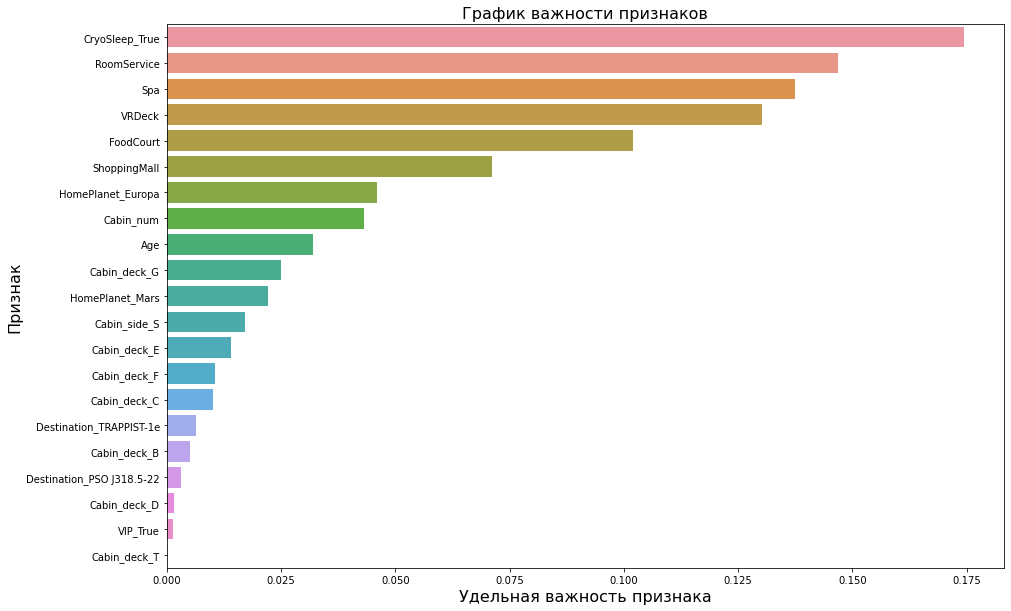

In [132]:
plt.figure(figsize = (15,10))
sns.barplot(data = feature_importances_df, y = 'feature', x = 'feature_importances')
plt.title('График важности признаков', fontsize = 16)
plt.xlabel('Удельная важность признака', fontsize = 16)
plt.ylabel('Признак', fontsize = 16);

# Приведение тестовых данных к виду тренировочных

In [184]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [185]:
# Сплитим Cabin
Cabin_test = df_test.Cabin
df_test['Cabin_deck'] = Cabin_test.apply(lambda cabin: str(cabin).split('/')[0])
df_test['Cabin_num'] = Cabin_test.dropna().apply(lambda cabin: int(str(cabin).split('/')[1]))
df_test['Cabin_side'] = Cabin_test.dropna().apply(lambda cabin: str(cabin).split('/')[2])
df_test.drop(columns = 'Cabin', inplace = True)

In [186]:
# Заменяем nan на G
df_test.Cabin_deck.replace('nan', 'G', inplace = True)

In [187]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Destination   4185 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Name          4183 non-null   object 
 12  Cabin_deck    4277 non-null   object 
 13  Cabin_num     4177 non-null   float64
 14  Cabin_side    4177 non-null   object 
dtypes: float64(7), object(8)
memory usage: 501.3+ KB


In [188]:
cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_num']
for column in df_test[cols]:
    df_test[column].fillna(value = df_test[column].mean(), axis = 0, inplace = True)

In [189]:
cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_deck', 'Cabin_side']
for column in df_test[cols]:
    df_test[column].fillna(df_test[column].value_counts().sort_values().index[-1], axis = 0, inplace = True)

In [190]:
test_PassID = df_test.PassengerId
df_test.drop(['PassengerId', 'Name'], axis = 1, inplace = True)

In [191]:
cols = ['CryoSleep', 'VIP']
for column in df_test[cols]:
    df_test[column] = df_test[column].astype('object')

In [192]:
categorical_data_test = selector(df_test)
categorical_data_test = df_test[categorical_data_test]
test_new = df_test.join(pd.get_dummies(categorical_data_test, drop_first = True))

In [193]:
test_new.drop(categorical_data_test.columns, axis = 1, inplace = True)

In [194]:
scaler = MinMaxScaler()
normal_data_test = scaler.fit_transform(test_new[['Age', 'Cabin_num', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
normal_data_test = pd.DataFrame(columns = ['Age', 'Cabin_num', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], data = normal_data_test)

In [195]:
test_new.drop(['Age', 'Cabin_num', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis = 1, inplace = True)
test_new = pd.concat([test_new, normal_data_test], axis = 1)

In [196]:
test_new.head()

HomePlanet_Europa  HomePlanet_Mars  CryoSleep_True  \
0                  0                0               1   
1                  0                0               0   
2                  1                0               1   
3                  1                0               0   
4                  0                0               0   

   Destination_PSO J318.5-22  Destination_TRAPPIST-1e  VIP_True  Cabin_deck_B  \
0                          0                        1         0             0   
1                          0                        1         0             0   
2                          0                        0         0             0   
3                          0                        1         0             0   
4                          0                        1         0             0   

   Cabin_deck_C  Cabin_deck_D  Cabin_deck_E  ...  Cabin_deck_G  Cabin_deck_T  \
0             0             0             0  ...             1             0   
1             0             0             0  ...             0             0   
2             1             0             0  ...             0             0   
3             1             0             0  ...             0             0   
4             0             0             0  ...             0             0   

   Cabin_side_S       Age  Cabin_num  RoomService  FoodCourt  ShoppingMall  \
0             1  0.341772   0.001587     0.000000   0.000000       0.00000   
1             1  0.240506   0.002116     0.000000   0.000356       0.00000   
2             1  0.392405   0.000000     0.000000   0.000000       0.00000   
3             1  0.481013   0.000529     0.000000   0.263206       0.00000   
4             1  0.253165   0.002646     0.000865   0.000000       0.07658   

        Spa    VRDeck  
0  0.000000  0.000000  
1  0.142260  0.000000  
2  0.000000  0.000000  
3  0.009121  0.026266  
4  0.000000  0.000000  

[5 rows x 21 columns]

In [197]:
predict = best_clf_rf.predict(test_new)

In [198]:
predict = pd.Series(predict)

In [199]:
prediction = pd.DataFrame({'PassengerID': test_PassID, 'Transported': predict})

In [201]:
prediction['Transported'] = prediction['Transported'].astype(bool)

In [203]:
prediction.to_csv(r'e:\cka4ok\CODE\Kaggle\Starship_Titanic\submission.csv', index = False)

# Обучение модели Логистическая регрессия

In [218]:
logr = LogisticRegression(C=10, class_weight='balanced', random_state=42, solver='lbfgs', max_iter=1000)

In [219]:
fitted = logr.fit(X = X_train, y = y_train)

In [224]:
pred = fitted.predict(test_new)
pred = pd.Series(pred)
prediction_lr = pd.DataFrame({'PassengerID': test_PassID, 'Transported': pred})
prediction_lr['Transported'] = prediction_lr['Transported'].astype(bool)
prediction_lr.to_csv(r'e:\cka4ok\CODE\Kaggle\Starship_Titanic\submission.csv', index = False)

In [234]:
test_new = test_new[['Age', 'Cabin_num', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_Europa']]

In [230]:
X_train_sample = X_train[['Age', 'Cabin_num', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_Europa']]

In [231]:
fitted_sample = logr.fit(X = X_train_sample, y = y_train)

In [235]:
pred_sample = fitted_sample.predict(test_new)
pred_sample = pd.Series(pred_sample)
prediction_lr_sample = pd.DataFrame({'PassengerID': test_PassID, 'Transported': pred_sample})
prediction_lr_sample['Transported'] = prediction_lr_sample['Transported'].astype(bool)
prediction_lr_sample.to_csv(r'e:\cka4ok\CODE\Kaggle\Starship_Titanic\submission.csv', index = False)

# Обучение модели Случайный лес с выбранными признаками

In [236]:
clf_rf_sf = RandomForestClassifier()
parametrs = {'n_estimators': range(10,50,10), 'max_depth': range(1,12,2), 'min_samples_split': range(2,9,2), 'min_samples_leaf': range(1,7)}

In [237]:
grid_search_cv_rf_sf = GridSearchCV(clf_rf_sf, parametrs, cv = 3, n_jobs=-1)

In [238]:
grid_search_cv_rf_sf.fit(X_train_sample, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [239]:
best_clf_rf_sf = grid_search_cv_rf_sf.best_estimator_

In [240]:
predict_sf = best_clf_rf_sf.predict(test_new)

In [243]:
predict_sf = pd.Series(predict_sf)
prediction_rf_sf = pd.DataFrame({'PassengerID': test_PassID, 'Transported': predict_sf})
prediction_rf_sf['Transported'] = prediction_rf_sf['Transported'].astype(bool)
prediction_rf_sf.to_csv(r'e:\cka4ok\CODE\Kaggle\Starship_Titanic\submission.csv', index = False)